# Classification of The Books by Dificulty Levels

## Importing the Libraries

In [0]:
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/My Drive/Tooth Identifier/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from decimal import Decimal
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import model_selection
from tqdm import tqdm_notebook
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)

In [0]:
!ls gdrive/My\ Drive/Tooth\ Identifier/

 ArticleData4.csv	        __pycache__
 ArticleData4Unlabeled.csv      SentenceParcerForTenses.py
 ArticleDataColab.csv	        SentenceToTenses.csv
 ArticleIdentenfier.ipynb       sen_test.csv
'Article Identify Test.ipynb'   tense_dt_model
'Article Prediction.ipynb'     'Text Comlexity Colab 2.ipynb'
 article_smote_rf_model        'Text Complexity Colab.ipynb'
 Books			        TextComplexityReader.py
 common.csv		        tooth_tenser.py
'Easy Reading'		        vocabulary.csv
 Economist


# Setting The Data and Preparing It

In [0]:
df_advance = pd.read_csv('vocabulary.csv')
print('Total Advance Words: ', len(df_advance.index))

Total Advance Words:  983


In [0]:
df_common = pd.read_csv('common.csv')
print('Total Common Words: ', len(df_common.index))

Total Common Words:  2657


In [0]:
df = pd.read_csv('gdrive/My Drive/Tooth Identifier/ArticleData4Unlabeled.csv')

In [0]:

row = [['Total Books Read',len(df.index)],['Total Words Read',df['Number of Words'].sum()],['Total Sentence Read',df['Number of Sentence'].sum()], ['Number of Features',len(df.columns)]]
columns = ['Total Books Read','Total Words Read','Total Sentence Read']
df_summary = pd.DataFrame(row,columns=['Feature','Total'])
df_summary

,Feature,Total
0,Total Books Read,198
1,Total Words Read,3118072
2,Total Sentence Read,628631
3,Number of Features,62


In [0]:
print(len(columns))
df.columns

3


Index(['Name', 'Number of Sentence', 'Number of Words', 'Number of Paragraph',
       'Words per Sentence (%)', 'Number of Characters',
       'Character per Words (%)', 'Sentence per Paragraph (%)',
       'Number of Sylables', 'Syllables per Word (%)',
       'Number of Monosyllable', 'Monosyllable per Word (%)',
       'Disyllable per Word (%)', 'Number of Complex Words',
       'Complex Words per Word (%)', 'Number of Advance Words',
       'Advance Words per Words (%)', 'Number of Common Words',
       'Common Words per Words (%)', 'Verbs per Words (%)',
       'Verbs per Sentences (%)', 'Ditransverbs per Sentences (%)',
       'Transverbs per Sentences (%)', 'Intransitverbs per Sentences (%)',
       'Auxverbs per Sentences (%)', 'Conjuctions per Sentences (%)',
       'Nouns per Words (%)', 'Nouns per Sentence (%)',
       'Puctuation per Sentence', 'Adjective per Word (%)',
       'Adjective per Sentence (%)', 'Adpositions per Sentences (%)',
       'Adverb per Sentence (%)', '

# The Corralation Matrix

In [0]:
sns.set()
attributes_mean= list(df.columns[1:])
corr = df.corr()
plt.figure(figsize=(62,62))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= attributes_mean, yticklabels= attributes_mean,
           cmap= 'coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**The corralation matrix allow us to see which parameter has a high corralation with the tense of the sentence and which does not. So we can drop the prameter that has little or no relation with the tense of the sentence.**


## Dropping the low correlation parameters

In [0]:
df.drop(['Number of Sentence','Number of Words','Number of Paragraph','Number of Characters','Number of Sylables','Number of Monosyllable',\
              'Number of Complex Words','Number of Advance Words','Number of Common Words','Auxverbs per Sentences (%)',\
        'Verbs per Words (%)','Sentence per Paragraph (%)','Dale Chall Score', 'Flesch Reading Ease Score',\
       'New Flesch Reading Ease Score', 'Gunning Fog Score', 'SMOG Score',\
       'FORCAST Score', 'ARI Score', 'Coleman Liau Score', 'LIX Score',\
       'RIX Score', 'Powers Sumner Kearl', 'Spache Score','Puctuation per Sentence', 'Adjective per Word (%)','Adpositions per Sentences (%)',\
        'Conjuctions per Sentences (%)','Nouns per Words (%)','Number of Unknown Words','Disyllable per Word (%)',\
        'Transverbs per Sentences (%)','Intransitverbs per Sentences (%)',\
         'Verbs per Sentences (%)','Adjective per Sentence (%)','Pronoun per Sentence (%)','Unknown Words per Words (%)',\
         'Future Perfect (%)','Future Progressive (%)','Future Perfect (%)','Present Perfect (%)'], inplace=True, axis=1)

## New Corraletin Matrix

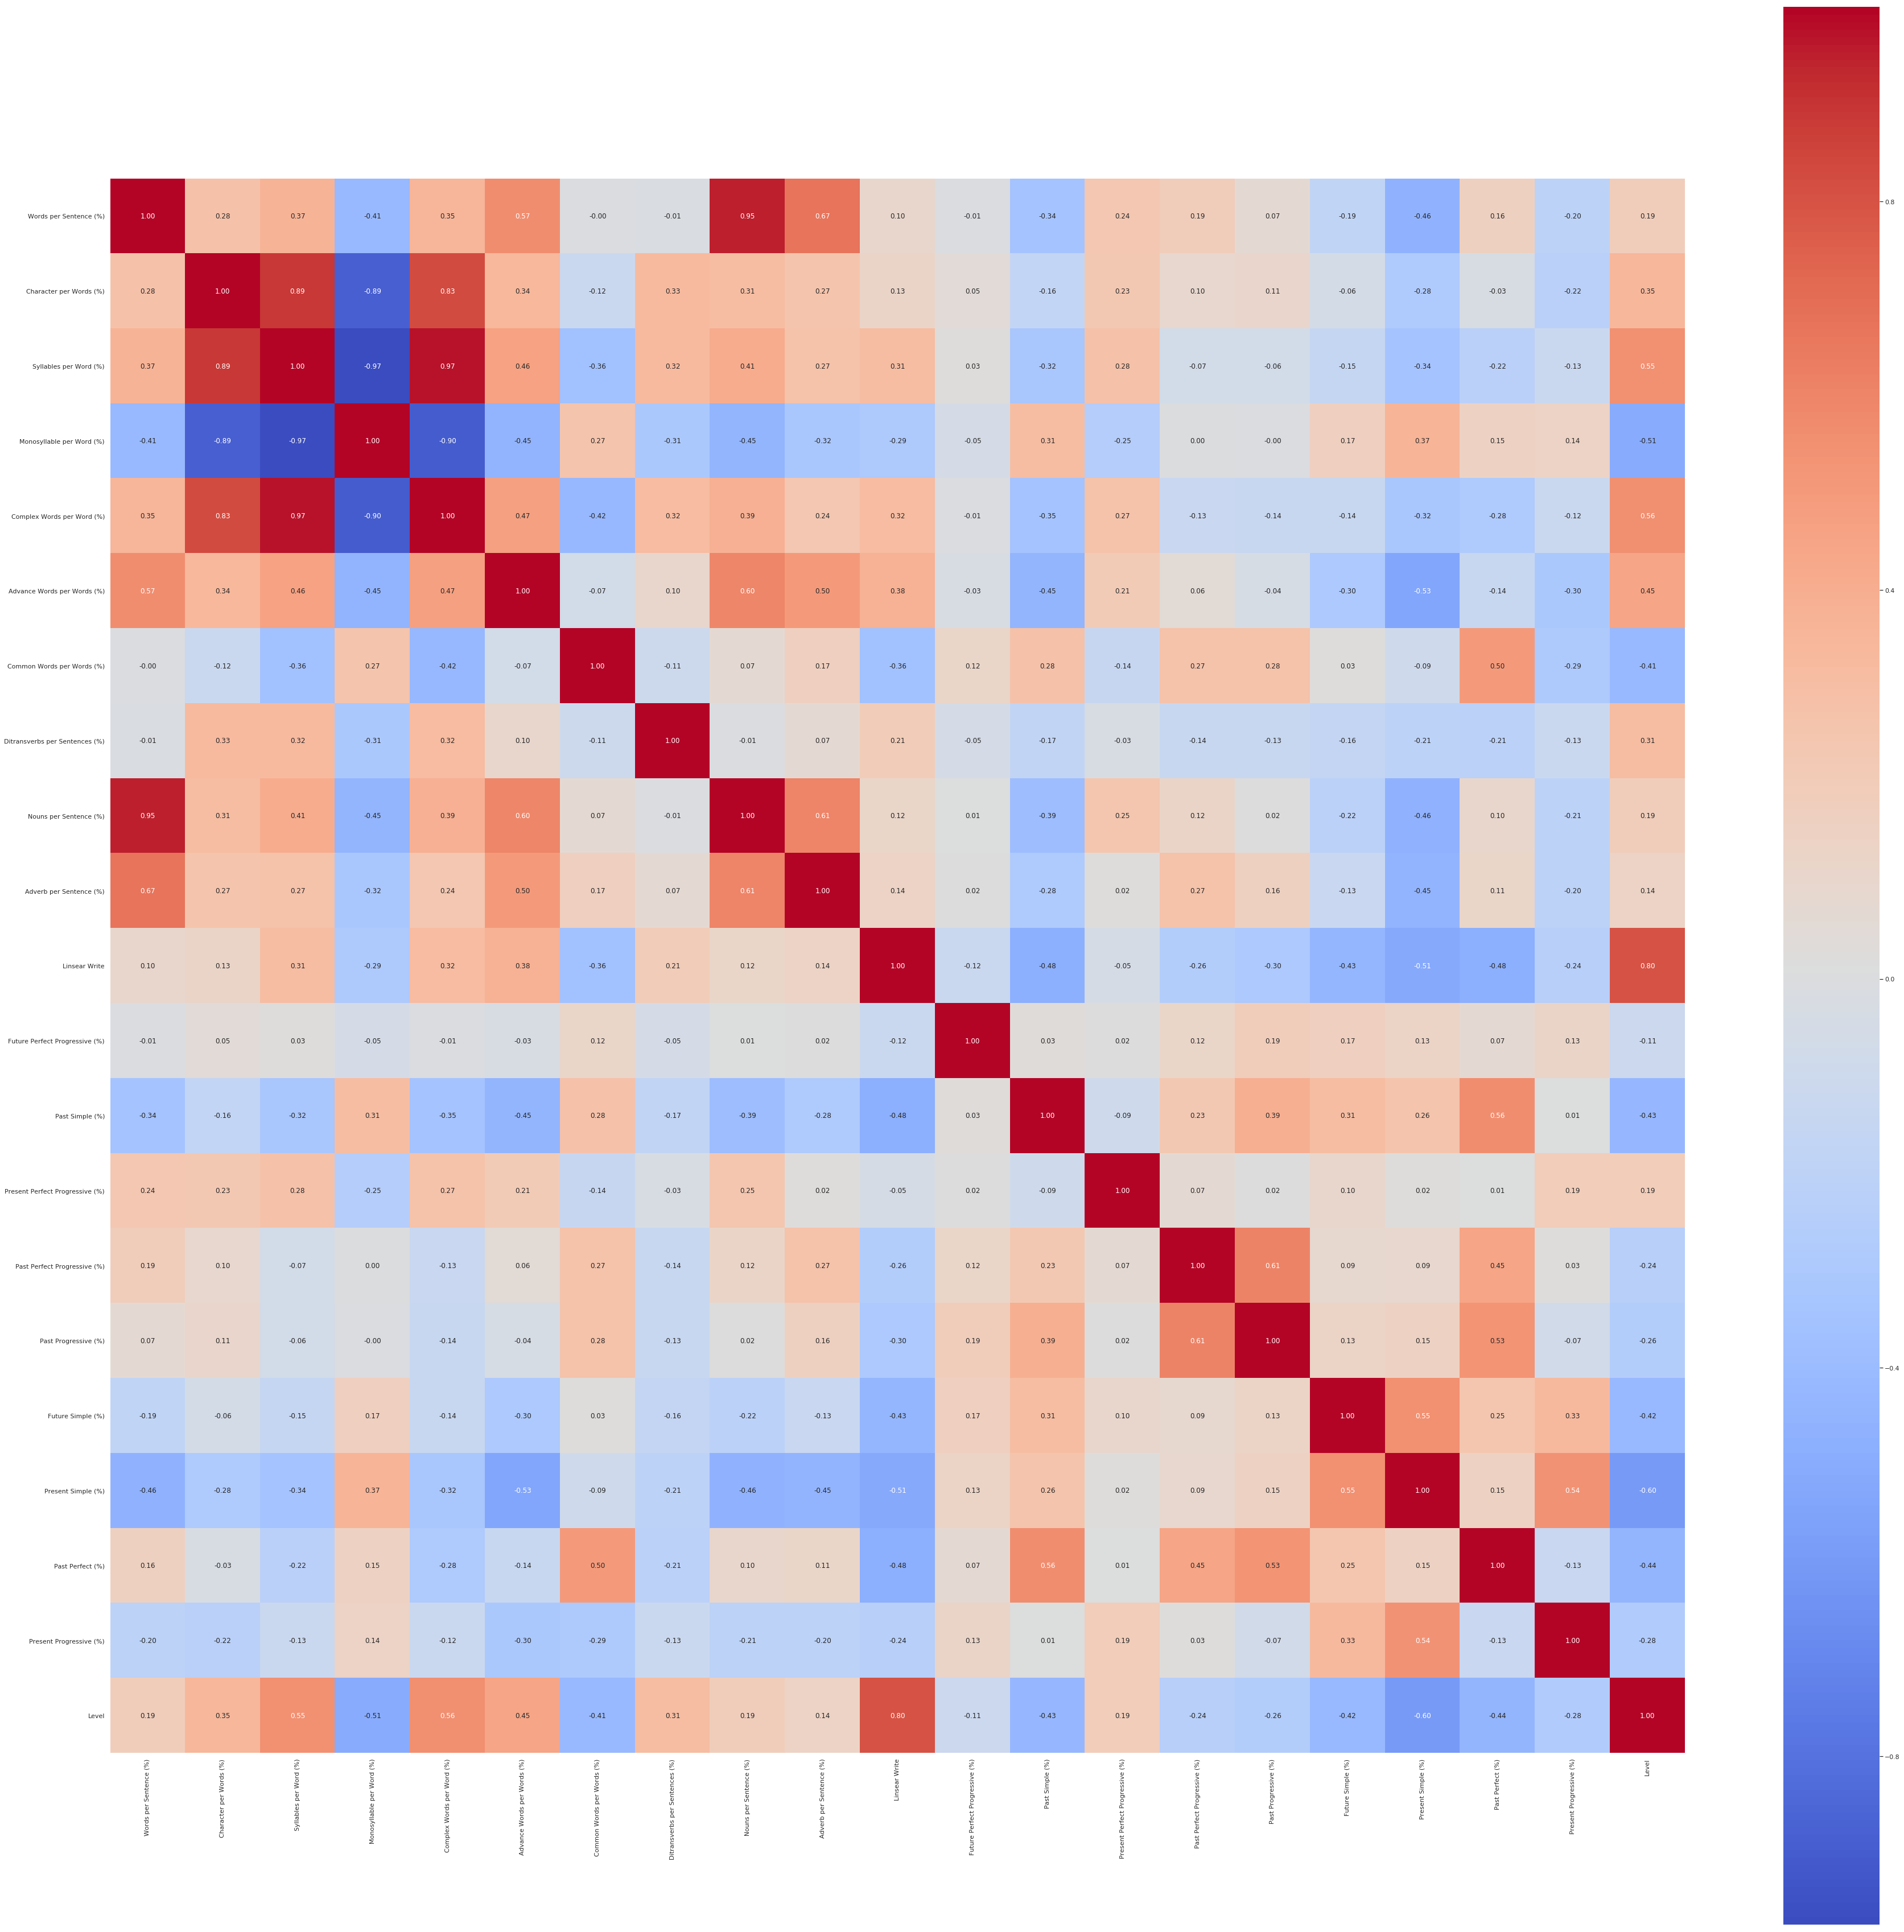

In [0]:
sns.set()
attributes_mean= list(df.columns[1:])
corr = df.corr()
plt.figure(figsize=(62,62))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= attributes_mean, yticklabels= attributes_mean,
           cmap= 'coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

These are the parameters that has higher correlation with the tense of the sentence.

In [0]:
df.columns

Index(['Name', 'Words per Sentence (%)', 'Character per Words (%)',
       'Syllables per Word (%)', 'Monosyllable per Word (%)',
       'Complex Words per Word (%)', 'Advance Words per Words (%)',
       'Common Words per Words (%)', 'Ditransverbs per Sentences (%)',
       'Nouns per Sentence (%)', 'Adverb per Sentence (%)', 'Linsear Write',
       'Future Perfect Progressive (%)', 'Past Simple (%)',
       'Present Perfect Progressive (%)', 'Past Perfect Progressive (%)',
       'Past Progressive (%)', 'Future Simple (%)', 'Present Simple (%)',
       'Past Perfect (%)', 'Present Progressive (%)', 'Level'],
      dtype='object')

## Number of Records and Levels Distiribution

Number of Rows:  198
2    39
1    35
6    27
0    23
7    21
4    18
3    18
5    17
Name: Level, dtype: int64


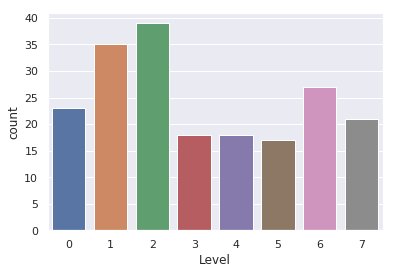

In [0]:
sns.countplot(df['Level'],label="Count")
print('Number of Rows: ',len(df.index))
print(df.Level.value_counts())


## Some Tables and Graphs About The Data

In [0]:
df[['Name', 'Level', 'Linsear Write','Advance Words per Words (%)', 'Common Words per Words (%)','Complex Words per Word (%)',\
    'Monosyllable per Word (%)']].sort_values('Linsear Write').loc[df['Level'] == 2]

,Name,Level,Linsear Write,Advance Words per Words (%),Common Words per Words (%),Complex Words per Word (%),Monosyllable per Word (%)
171,Jack and the Beanstalk,2,1.620970,0.269542,56.334232,3.234501,74.932615
163,Snow White,2,4.922211,3.991812,50.665302,7.369498,67.451382
154,The Emperor's New Clothes,2,5.186957,4.021448,39.544236,23.190349,42.091153
22,Mary's Child,2,5.243886,2.300242,52.300242,12.953995,55.326877
142,The Paradise of Children,2,5.445587,2.857143,46.878307,18.624339,52.592593
158,The Gingerbread Man,2,5.722943,1.003344,55.518395,9.810479,58.305463
152,St. George and the Dragon,2,6.165017,1.760176,35.313531,16.721672,49.394939
157,Cinderella,2,6.465531,2.905812,46.192385,18.436874,49.198397
139,Huckleberry,2,7.123561,2.125775,52.701506,11.868911,56.598760
35,05 Freckles,2,8.601273,1.108968,40.694311,4.243009,75.024108


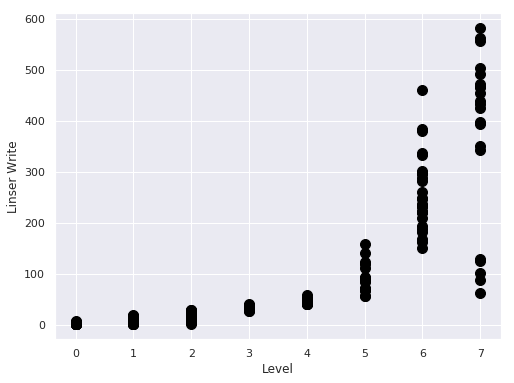

In [0]:
level = df['Level'].values
linsear_write = df['Linsear Write'].values
X = np.array(list(zip(level, linsear_write)))
plt.figure(figsize=(8,6))
plt.scatter(level, linsear_write, c='black', s=100)
plt.xlabel('Level')
plt.ylabel('Linser Write')
plt.show()

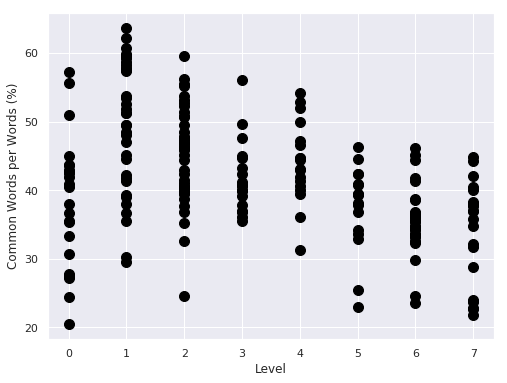

In [0]:
level = df['Level'].values
linsear_write = df['Common Words per Words (%)'].values
X = np.array(list(zip(level, linsear_write)))
plt.figure(figsize=(8,6))
plt.scatter(level, linsear_write, c='black', s=100)
plt.xlabel('Level')
plt.ylabel('Common Words per Words (%)')
plt.show()

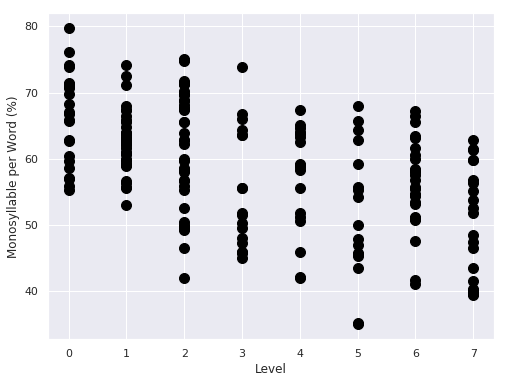

In [0]:
level = df['Level'].values
linsear_write = df['Monosyllable per Word (%)'].values
X = np.array(list(zip(level, linsear_write)))
plt.figure(figsize=(8,6))
plt.scatter(level, linsear_write, c='black', s=100)
plt.xlabel('Level')
plt.ylabel('Monosyllable per Word (%)')
plt.show()

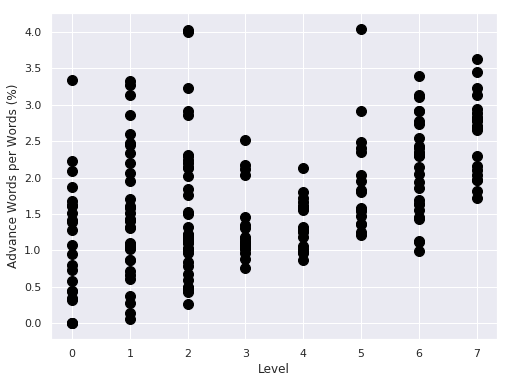

In [0]:
level = df['Level'].values
linsear_write = df['Advance Words per Words (%)'].values
X = np.array(list(zip(level, linsear_write)))
plt.figure(figsize=(8,6))
plt.scatter(level, linsear_write, c='black', s=100)
plt.xlabel('Level')
plt.ylabel('Advance Words per Words (%)')
plt.show()

In [0]:
df.sample(5)

,Name,Words per Sentence (%),Character per Words (%),Syllables per Word (%),Monosyllable per Word (%),Complex Words per Word (%),Advance Words per Words (%),Common Words per Words (%),Ditransverbs per Sentences (%),Nouns per Sentence (%),Adverb per Sentence (%),Linsear Write,Future Perfect Progressive (%),Past Simple (%),Present Perfect Progressive (%),Past Perfect Progressive (%),Past Progressive (%),Future Simple (%),Present Simple (%),Past Perfect (%),Present Progressive (%),Level
101,Cormac-McCarthy-No-Country-for-Old-Men-Vintage...,414.744407,435.374511,141.785914,67.177194,7.300168,1.464505,41.439352,0.0,126.104092,24.249449,182.642190,0.034775,23.855338,0.069549,1.843051,3.036977,4.625014,43.317492,21.850006,0.591167,6
147,Hansel and Gretel,621.428571,498.314176,148.045977,58.544061,6.130268,1.839080,59.616858,0.0,200.952381,25.238095,9.221839,0.000000,14.285714,0.000000,4.761905,0.476190,7.142857,34.285714,37.619048,1.428571,2
3,"John Escott, Adam Willis - Newspaper Chase (Pe...",361.965812,485.950413,161.747344,58.677686,16.174734,0.354191,27.272727,0.0,110.256410,5.982906,4.264852,0.000000,0.854701,0.000000,0.000000,0.000000,0.854701,88.888889,1.282051,7.692308,0
28,14 Subject 117,254.734721,421.776958,142.736620,67.703665,8.278408,0.790931,45.109412,0.0,70.785762,5.439893,18.222484,0.067159,33.378106,0.000000,0.000000,0.067159,3.425118,51.242445,10.006716,1.813298,2
17,(Oxford Bookworms Library) O. Henry - New York...,434.765101,450.200679,147.236801,63.877740,9.292992,1.080580,51.373881,0.0,127.651007,15.838926,17.382788,0.134228,35.973154,0.000000,1.744966,1.610738,4.429530,32.751678,22.684564,0.536913,1


# Confining The Target Label

The target label has 8 different unique value. I believe it is too much and reducing the difficulty level to 5 diffirent part would be more accurate;

In [0]:
df_l2 = df


In [0]:
df_l2['Level2'] = df_l2.Level.apply(lambda x: 0 if x == 0 or x == 1 else 1 if x == 2 else 2 if x == 3 or x == 4 else 3 if x == 5 or x == 6 else 4)

In [0]:
df_l2[['Level','Level2']].sample(10)

,Level,Level2
59,3,2
186,5,3
107,7,4
179,6,3
8,1,0
7,0,0
63,4,2
172,2,1
84,5,3
26,2,1


Number of Rows:  198
2    39
1    35
6    27
0    23
7    21
4    18
3    18
5    17
Name: Level, dtype: int64


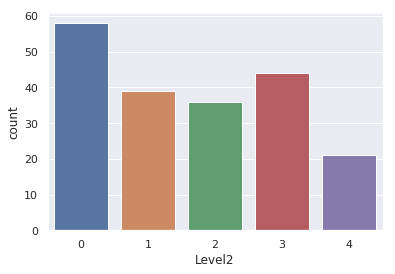

In [0]:
sns.countplot(df_l2['Level2'],label="Count")
print('Number of Rows: ',len(df_l2.index))
print(df_l2.Level.value_counts())


# Randon Forest Classification

In [0]:
y = np.array(df_l2.Level2)
X = np.array(df_l2.drop(['Name','Level','Level2'], axis=1))
print('X and y:', X.shape, y.shape)

X and y: (198, 20) (198,)


In [0]:
seed = 40 #for reproducibility
#--- Training and test portions of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)
print('Training and Test sizes:',len(X_train),len(X_test) ) #Dimension of the training and test sets

Training and Test sizes: 148 50


## Using SMOTE for Unbalance Data

In [0]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4,k_neighbors=5), RF(random_state=seed))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

print('Classifier used:\n', smote_model, '\n')
print( 'Training accuracy       :',(accuracy_score(y_train, smote_model.predict(X_train))) )
print( 'Classification accuracy :',(accuracy_score(y_test, smote_prediction)))

Classifier used:
 Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=4, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None

In [0]:
kf = model_selection.KFold(n_splits=5, random_state=seed)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
for train, test in kf.split(X_train, y_train):
  pipeline = make_pipeline_imb(SMOTE(random_state=4,k_neighbors=2), RF(random_state=seed))
  model = pipeline.fit(X_train[train], y_train[train])
  prediction = model.predict(X_train[test])

  accuracy.append(pipeline.score(X_train[train], y_train[train]))
  #precision.append(precision_score(y_train[test], prediction))
  #recall.append(recall_score(y_train[test], prediction))
  #f1.append(f1_score(y_train[test], prediction))
  #auc.append(roc_auc_score(y_train[test], prediction))
print()
print('CV accuracy: {}'.format(np.mean(accuracy)))



CV accuracy: 0.9898732374305654


In [0]:
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.50      0.67        10
           2       0.82      1.00      0.90         9
           3       1.00      0.91      0.95        11
           4       0.83      1.00      0.91         5

    accuracy                           0.88        50
   macro avg       0.90      0.88      0.87        50
weighted avg       0.90      0.88      0.87        50



### Dumping The Model As A File

In [0]:
import joblib

filename = '/content/gdrive/My Drive/Tooth Identifier/article_smote_rf_model'
joblib.dump(smote_model, filename)

['/content/gdrive/My Drive/Tooth Identifier/article_smote_rf_model']

## Tring Random Forest Without Using SMOTE

In [0]:
Clf_def = RF(random_state=seed)
kfold = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(Clf_def, X_train, y_train, cv=kfold, scoring='accuracy')
Clf_def.fit(X_train, y_train)
predictions = Clf_def.predict(X_test)
print('Classifier used:\n', Clf_def, '\n')
print( 'Training accuracy       :',(accuracy_score(y_train, Clf_def.predict(X_train))) )
print( 'Classification accuracy :',(accuracy_score(y_test, predictions)))

Classifier used:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False) 

Training accuracy       : 1.0
Classification accuracy : 0.82


In [0]:
param_grid = {"criterion"        : ['gini'],
              "min_samples_split": [3,5,7],
              "max_features"     : [4, 5, 6],
              "max_depth"        : [7,10,12],
              "min_samples_leaf" : [1],
              "n_estimators"     : [50,100]
              }

kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator = RF(random_state = seed), param_grid = param_grid, 
                           cv = kfolds, n_jobs = -1, verbose=5)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   10.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fractio...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=40,
                                              verbose=0, warm_start=False),
  

In [0]:

print('Best parameters:\n', grid_search.best_params_,'\n')
print('Average CV accuracy:', np.mean(grid_search.cv_results_['mean_test_score']))

Best parameters:
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 

Average CV accuracy: 0.8305805805805806


# Unsupervised clustering

In [0]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
df_simple = df[['Name','Level','Present Simple (%)','Linsear Write','Advance Words per Words (%)','Common Words per Words (%)', 'Complex Words per Word (%)','Advance Words per Words (%)','Monosyllable per Word (%)','Syllables per Word (%)','Character per Words (%)']]

In [0]:
df_l2.columns

Index(['Name', 'Words per Sentence (%)', 'Character per Words (%)',
       'Syllables per Word (%)', 'Monosyllable per Word (%)',
       'Complex Words per Word (%)', 'Advance Words per Words (%)',
       'Common Words per Words (%)', 'Ditransverbs per Sentences (%)',
       'Nouns per Sentence (%)', 'Adverb per Sentence (%)', 'Linsear Write',
       'Future Perfect Progressive (%)', 'Past Simple (%)',
       'Present Perfect Progressive (%)', 'Past Perfect Progressive (%)',
       'Past Progressive (%)', 'Future Simple (%)', 'Present Simple (%)',
       'Past Perfect (%)', 'Present Progressive (%)', 'Level', 'Level2'],
      dtype='object')

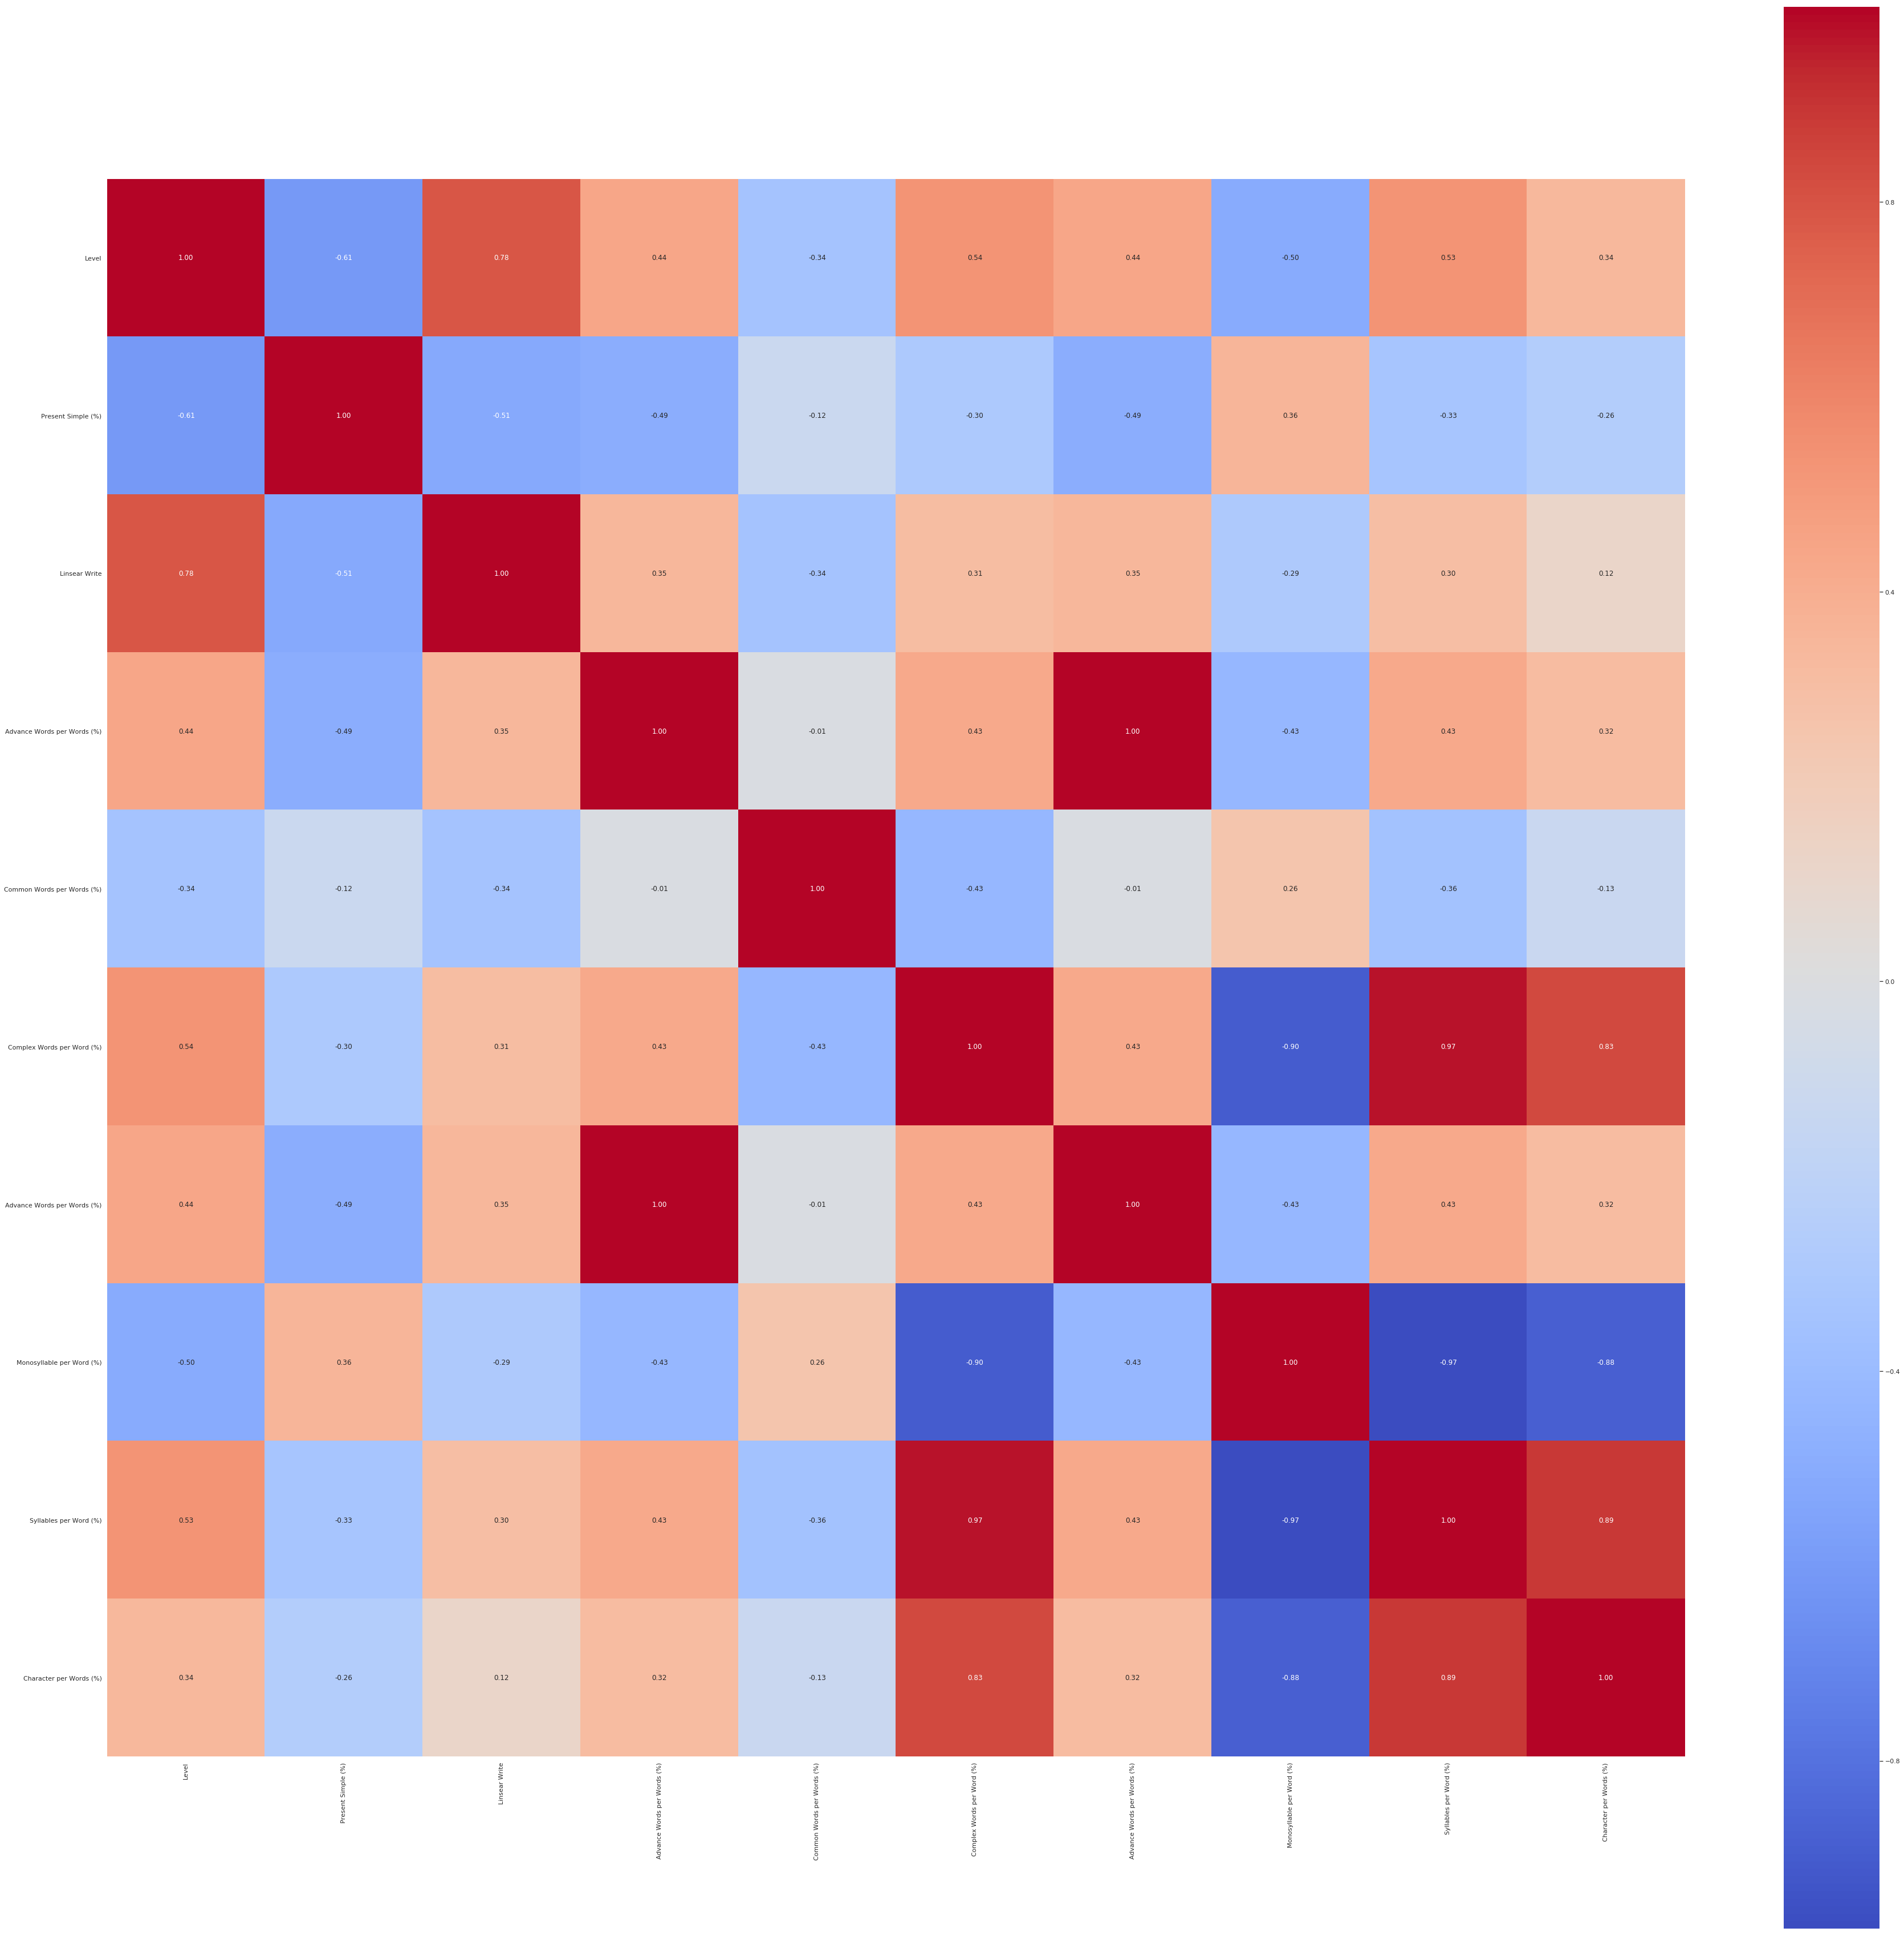

In [0]:
sns.set()
attributes_mean= list(df_simple.columns[1:])
corr = df_simple.corr()
plt.figure(figsize=(62,62))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= attributes_mean, yticklabels= attributes_mean,
           cmap= 'coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [0]:
X = df_l2.drop(['Name','Level'], axis=1).values # all rows in columns 0 and 1
scaler = StandardScaler()
X = scaler.fit_transform( X )

In [0]:
X

array([[-0.73724585, -0.87084311, -0.24742261, ..., -1.15133445,
         2.52924872,  0.        ],
       [-0.73102534, -0.77489862, -0.93829776, ...,  0.46741073,
        -0.14476779,  0.        ],
       [-0.80499536, -1.59388213, -1.30283709, ..., -1.25284808,
         3.8390784 ,  0.        ],
       ...,
       [ 2.00293215,  0.8417426 ,  1.55004722, ..., -1.03090869,
        -0.62813682,  0.        ],
       [-1.04453568, -0.09956025,  0.17422354, ..., -1.07619878,
        -0.56777605,  0.        ],
       [ 0.50441955, -0.02003301, -0.11050697, ..., -1.2322751 ,
        -0.65590278,  0.        ]])

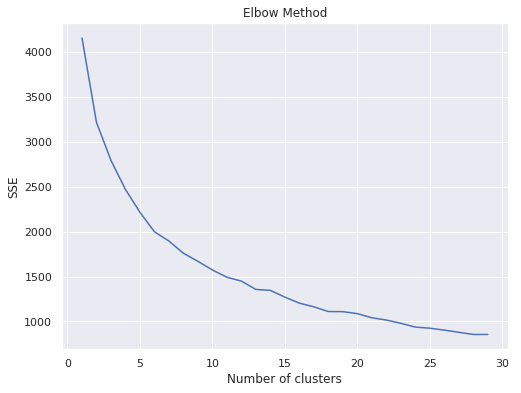

In [0]:
#Using the elbow method to find the ideal number of clusters
sse = []
for i in range(1,30):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,30),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [0]:
# Calculating the silhoutte coefficient
sil_coeff = []
for n_cluster in range(2, 30):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(X)
    label = kmeans.labels_
    sc = np.round( silhouette_score(X, label, metric='euclidean'), 3)
    sil_coeff.append(sc)
    print("{} clusters => Silhouette Coeff: {}".format(n_cluster, sc))

2 clusters => Silhouette Coeff: 0.225
3 clusters => Silhouette Coeff: 0.213
4 clusters => Silhouette Coeff: 0.236
5 clusters => Silhouette Coeff: 0.255
6 clusters => Silhouette Coeff: 0.256
7 clusters => Silhouette Coeff: 0.242
8 clusters => Silhouette Coeff: 0.244
9 clusters => Silhouette Coeff: 0.247
10 clusters => Silhouette Coeff: 0.258
11 clusters => Silhouette Coeff: 0.223
12 clusters => Silhouette Coeff: 0.211
13 clusters => Silhouette Coeff: 0.234
14 clusters => Silhouette Coeff: 0.216
15 clusters => Silhouette Coeff: 0.178
16 clusters => Silhouette Coeff: 0.211
17 clusters => Silhouette Coeff: 0.187
18 clusters => Silhouette Coeff: 0.237
19 clusters => Silhouette Coeff: 0.209
20 clusters => Silhouette Coeff: 0.184
21 clusters => Silhouette Coeff: 0.169
22 clusters => Silhouette Coeff: 0.179
23 clusters => Silhouette Coeff: 0.208
24 clusters => Silhouette Coeff: 0.197
25 clusters => Silhouette Coeff: 0.203
26 clusters => Silhouette Coeff: 0.169
27 clusters => Silhouette Coeff: 

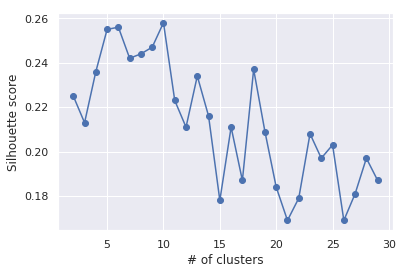

In [0]:
plt.plot(range(2,30), sil_coeff, marker='o', color='b')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.21238789308119152
For n_clusters = 4 The average silhouette_score is : 0.2450421518175894
For n_clusters = 5 The average silhouette_score is : 0.25522993934523264
For n_clusters = 6 The average silhouette_score is : 0.25787446001166664
For n_clusters = 7 The average silhouette_score is : 0.24816836987280727


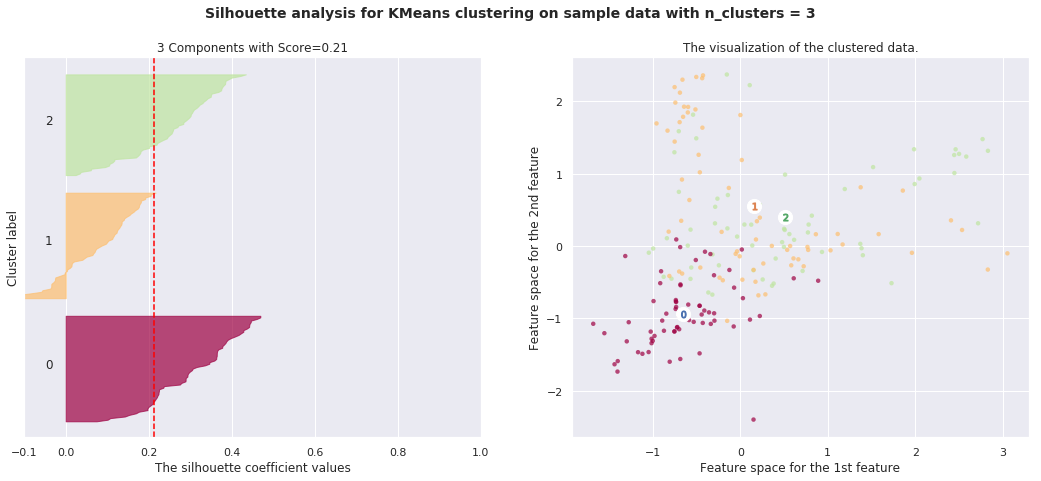

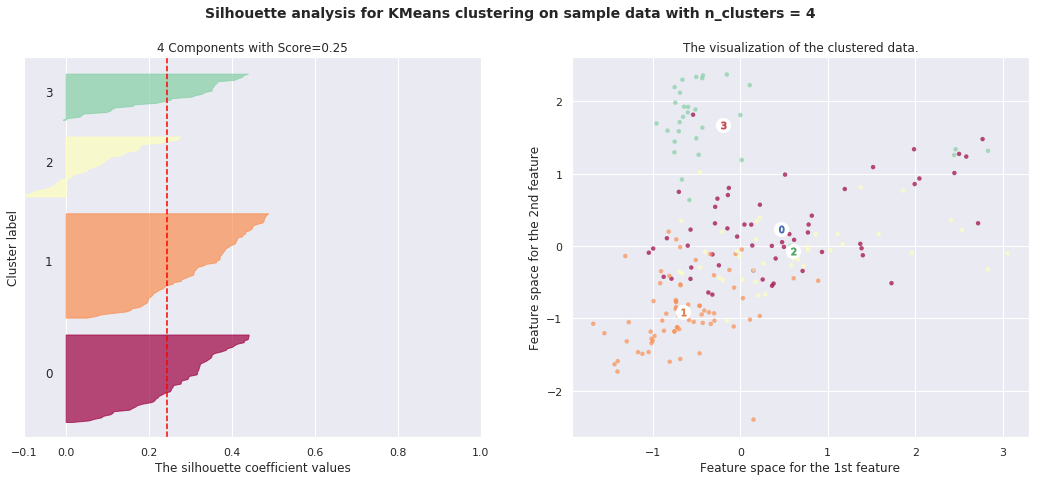

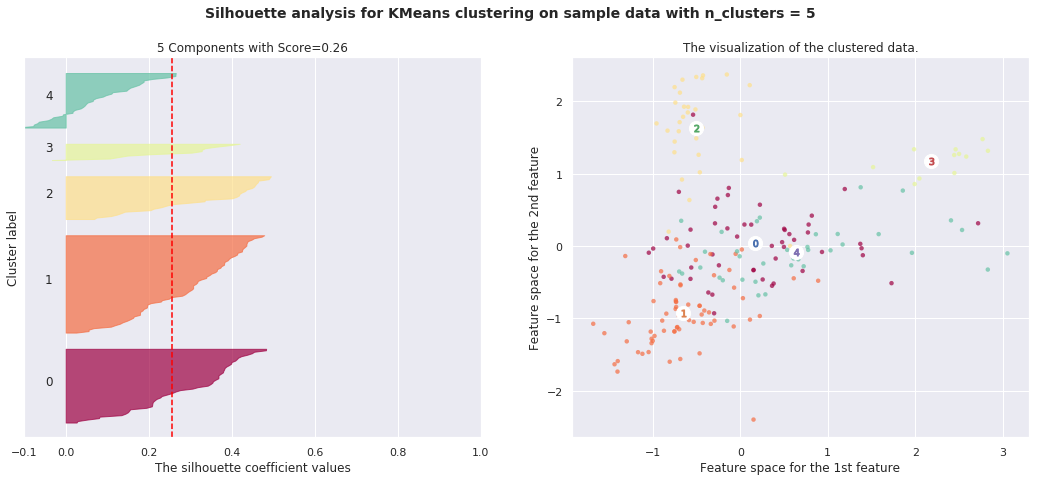

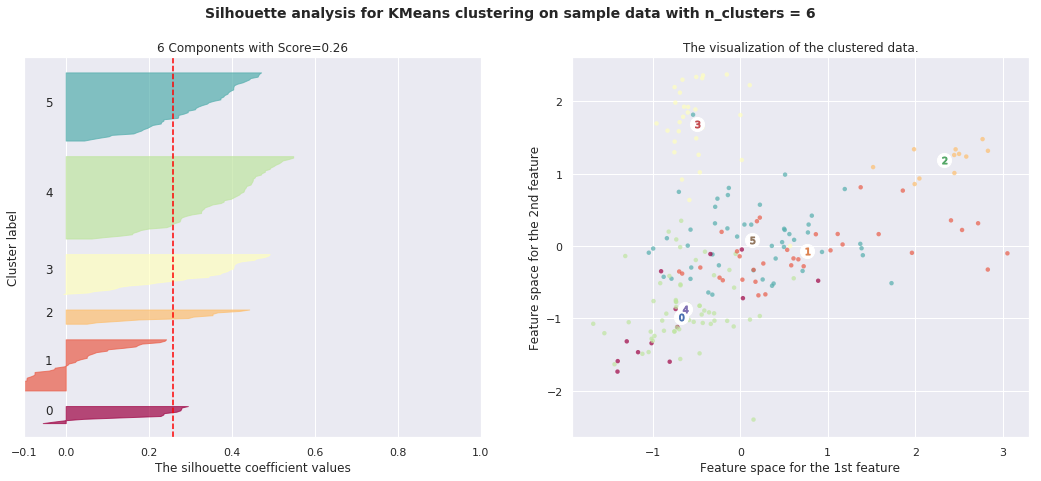

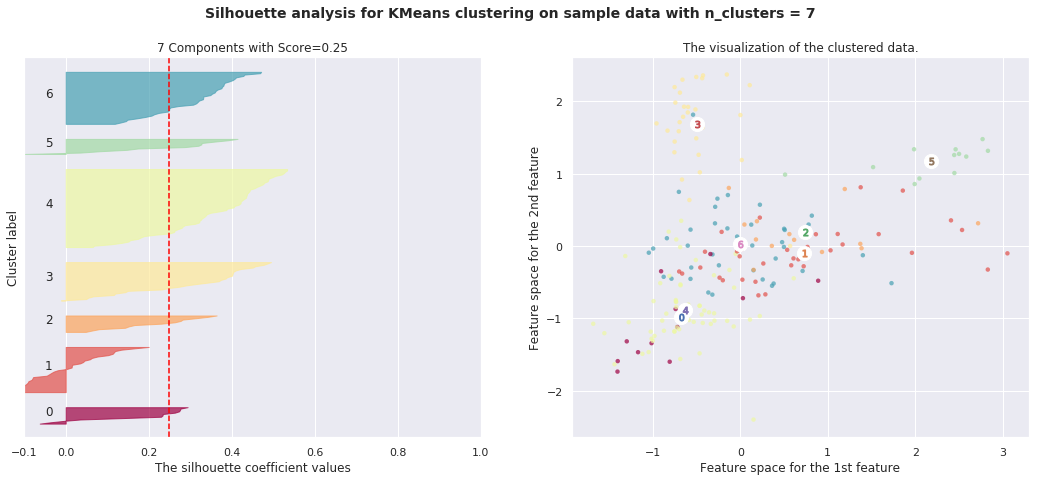

In [0]:
cluster_range = range( 3, 8 )

for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1, 2) #subplot with 1 row and 2 columns
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1]) #silhouette coeff range actually [-1, 1]
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X )

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples of cluster 'i' and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("{} Components with Score={:.2f}".format(n_clusters, silhouette_avg))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=80, 
                lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], 
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

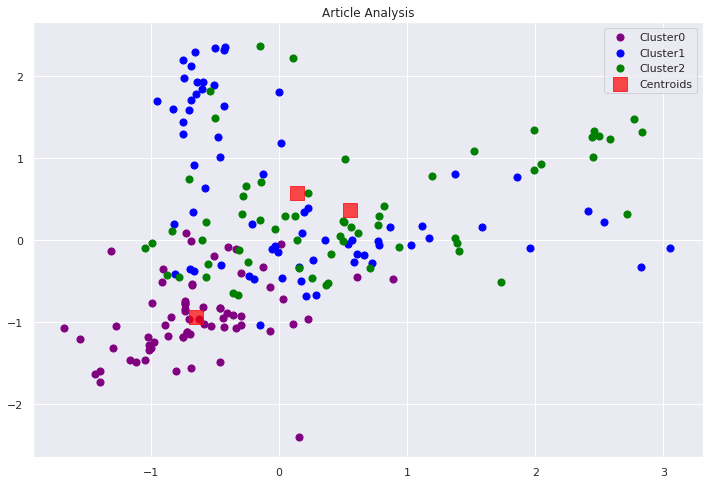

In [0]:
##Fitting kmeans to the dataset with k=3
km3 = KMeans(n_clusters = 3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(X)
label = km3.labels_

#Visualizing the clusters for k=6
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster2')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Article Analysis')

plt.legend()
plt.show()

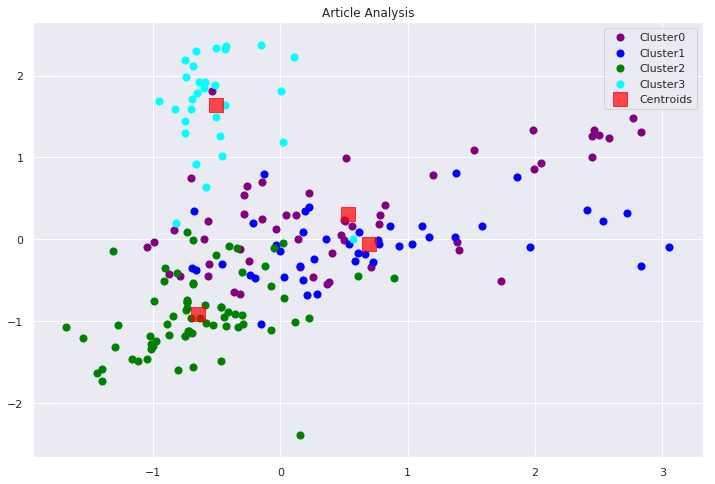

In [0]:
##Fitting kmeans to the dataset with k=4
km4 = KMeans(n_clusters = 4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
label = km4.labels_

#Visualizing the clusters for k=6
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Article Analysis')

plt.legend()
plt.show()

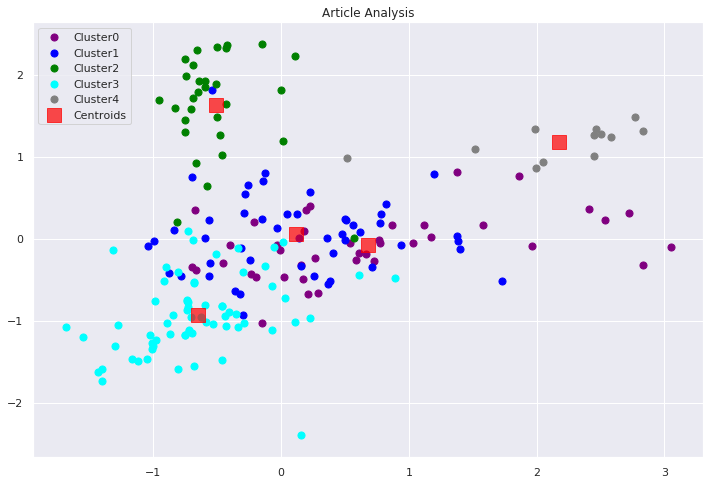

In [0]:
##Fitting kmeans to the dataset with k=5
km5 = KMeans(n_clusters = 5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)
label = km5.labels_

#Visualizing the clusters for k=6
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster3')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='gray',label='Cluster4')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Article Analysis')

plt.legend()
plt.show()

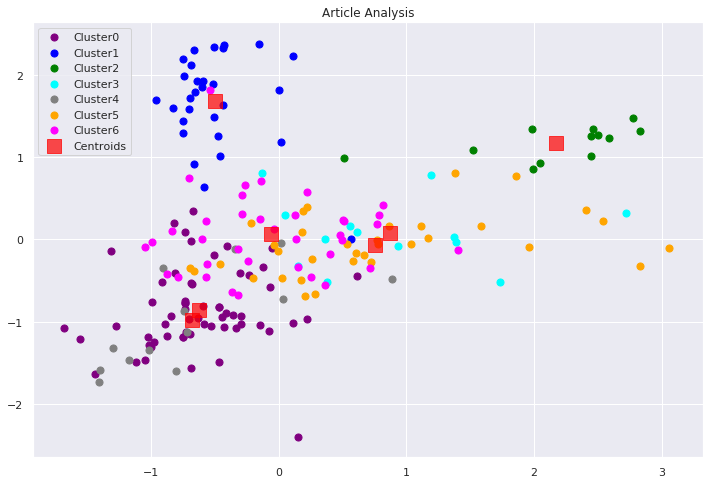

In [0]:
##Fitting kmeans to the dataset with k=7
km7 = KMeans(n_clusters = 7,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km7.fit_predict(X)
label = km7.labels_

#Visualizing the clusters for k=7
plt.figure(figsize=(12,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster3')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='gray',label='Cluster4')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster5')
plt.scatter(X[y_means==6,0],X[y_means==6,1],s=50, c='magenta',label='Cluster6')
plt.scatter(km7.cluster_centers_[:,0], km7.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Article Analysis')

plt.legend()
plt.show()

In [0]:
df['Cluster'] = km3.fit_predict(X)
df[['Name','Level','Cluster']].loc[df['Cluster'] == 2]

,Name,Level,Cluster
22,Mary's Child,2,2
46,The Three Strangers and Other Stories,5,2
68,Black Beauty [3] (1),4,2
70,Gulliver's Travels [2],4,2
86,Oliver Twist,5,2
87,Pride and Prejudice,5,2
88,Tess of the d'Urbervilles,5,2
89,The Trial by Franz Kafka,6,2
90,Thomas-Mann-Death-in-Venice_-And-Seven-Other-S...,7,2
91,Umberto-Eco-The-Prague-Cemetery-Houghton-Miffl...,7,2


In [0]:
df_predict = df_simple.loc[df.index == 200]
print(df_predict[['Name','Level']])
X_predic = df_predict.drop(['Name','Level'], axis=1).values # all rows in columns 0 and 1
scaler = StandardScaler()
X_predic = scaler.fit_transform( X_predic )
labels = km3.predict(X_predic)
print(labels)

                                    Name  Level
200  Jodi-Picoult-The-Pact_-A-Love-Story      6
[1]


In [0]:
km3 = KMeans(n_clusters = 3,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km3.fit_predict(X)
row2 = [['Level2 0 Cluster Mean',df.Cluster.loc[df_l2['Level2'] == 0].mode()],['Level2 1 Cluster Mean',df.Cluster.loc[df_l2['Level2'] == 1].mode()],['Level2 2 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 2].mode()],\
       ['Level2 3 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 3].mode()],['Level2 4 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 4].mode()]]
row = [['Level 0 Cluster Mean',df.Cluster.loc[df['Level'] == 0].mode()],['Level 1 Cluster Mean',df.Cluster.loc[df['Level'] == 1].mode()],['Level 2 Cluster Mean',df.Cluster.loc[df['Level'] == 2].mode()],\
       ['Level 3 Cluster Mean',df.Cluster.loc[df['Level'] == 3].mode()],['Level 4 Cluster Mean',df.Cluster.loc[df['Level'] == 4].mode()],['Level 5 Cluster Mean',df.Cluster.loc[df['Level'] == 5].mode()],\
       ['Level 6 Cluster Mean',df.Cluster.loc[df['Level'] == 6].mode()],['Level 7 Cluster Mean',df.Cluster.loc[df['Level'] == 7].mode()]]
df_level_cluster = pd.DataFrame(row2,columns=['Level Cluster','Mean'])
df_level_cluster

,Level Cluster,Mean
0,Level2 0 Cluster Mean,0 0 dtype: int32
1,Level2 1 Cluster Mean,0 0 dtype: int32
2,Level2 2 Cluster Mean,0 1 dtype: int32
3,Level2 3 Cluster Mean,0 2 dtype: int32
4,Level2 4 Cluster Mean,0 2 dtype: int32


In [0]:
km4 = KMeans(n_clusters = 4,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km4.fit_predict(X)
row2 = [['Level2 0 Cluster Mean',df.Cluster.loc[df_l2['Level2'] == 0].mode()],['Level2 1 Cluster Mean',df.Cluster.loc[df_l2['Level2'] == 1].mode()],['Level2 2 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 2].mode()],\
       ['Level2 3 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 3].mode()],['Level2 4 Cluster Mean',df_l2.Cluster.loc[df['Level2'] == 4].mode()]]
row = [['Level 0 Cluster Mean',df.Cluster.loc[df['Level'] == 0].mode()],['Level 1 Cluster Mean',df.Cluster.loc[df['Level'] == 1].mode()],['Level 2 Cluster Mean',df.Cluster.loc[df['Level'] == 2].mode()],\
       ['Level 3 Cluster Mean',df.Cluster.loc[df['Level'] == 3].mode()],['Level 4 Cluster Mean',df.Cluster.loc[df['Level'] == 4].mode()],['Level 5 Cluster Mean',df.Cluster.loc[df['Level'] == 5].mode()],\
       ['Level 6 Cluster Mean',df.Cluster.loc[df['Level'] == 6].mode()],['Level 7 Cluster Mean',df.Cluster.loc[df['Level'] == 7].mode()]]
df_level_cluster = pd.DataFrame(row2,columns=['Level Cluster','Mean'])
df_level_cluster

,Level Cluster,Mean
0,Level2 0 Cluster Mean,0 2 dtype: int32
1,Level2 1 Cluster Mean,0 2 dtype: int32
2,Level2 2 Cluster Mean,0 3 dtype: int32
3,Level2 3 Cluster Mean,0 0 dtype: int32
4,Level2 4 Cluster Mean,0 0 dtype: int32


In [0]:
km5 = KMeans(n_clusters = 5,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km5.fit_predict(X)
row = [['Level 0 Cluster Mean',df.Cluster.loc[df['Level'] == 0].mode()],['Level 1 Cluster Mean',df.Cluster.loc[df['Level'] == 1].mode()],['Level 2 Cluster Mean',df.Cluster.loc[df['Level'] == 2].mode()],\
       ['Level 3 Cluster Mean',df.Cluster.loc[df['Level'] == 3].mode()],['Level 4 Cluster Mean',df.Cluster.loc[df['Level'] == 4].mode()],['Level 5 Cluster Mean',df.Cluster.loc[df['Level'] == 5].mode()],\
       ['Level 6 Cluster Mean',df.Cluster.loc[df['Level'] == 6].mode()],['Level 7 Cluster Mean',df.Cluster.loc[df['Level'] == 7].mode()]]
df_level_cluster = pd.DataFrame(row,columns=['Level Cluster','Mean'])
df_level_cluster

,Level Cluster,Mean
0,Level 0 Cluster Mean,0 1 dtype: int32
1,Level 1 Cluster Mean,0 1 dtype: int32
2,Level 2 Cluster Mean,0 0 dtype: int32
3,Level 3 Cluster Mean,0 2 dtype: int32
4,Level 4 Cluster Mean,0 0 1 2 dtype: int32
5,Level 5 Cluster Mean,0 2 dtype: int32
6,Level 6 Cluster Mean,0 4 dtype: int32
7,Level 7 Cluster Mean,0 4 dtype: int32


In [0]:
km7 = KMeans(n_clusters = 7,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km7.fit_predict(X)
row = [['Level 0 Cluster Mean',df.Cluster.loc[df['Level'] == 0].mode()],['Level 1 Cluster Mean',df.Cluster.loc[df['Level'] == 1].mode()],['Level 2 Cluster Mean',df.Cluster.loc[df['Level'] == 2].mode()],\
       ['Level 3 Cluster Mean',df.Cluster.loc[df['Level'] == 3].mode()],['Level 4 Cluster Mean',df.Cluster.loc[df['Level'] == 4].mode()],['Level 5 Cluster Mean',df.Cluster.loc[df['Level'] == 5].mode()],\
       ['Level 6 Cluster Mean',df.Cluster.loc[df['Level'] == 6].mode()],['Level 7 Cluster Mean',df.Cluster.loc[df['Level'] == 7].mode()]]
df_level_cluster = pd.DataFrame(row,columns=['Level Cluster','Mean'])
df_level_cluster

,Level Cluster,Mean
0,Level 0 Cluster Mean,0 2 dtype: int32
1,Level 1 Cluster Mean,0 2 dtype: int32
2,Level 2 Cluster Mean,0 4 dtype: int32
3,Level 3 Cluster Mean,0 6 dtype: int32
4,Level 4 Cluster Mean,0 6 dtype: int32
5,Level 5 Cluster Mean,0 6 dtype: int32
6,Level 6 Cluster Mean,0 0 dtype: int32
7,Level 7 Cluster Mean,0 0 dtype: int32


In [0]:
km3 = KMeans(n_clusters = 3,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km3.fit_predict(X)
row = [['Level 0 Cluster Mean',df.Cluster.loc[df['Level'] == 0].mode()],['Level 1 Cluster Mean',df.Cluster.loc[df['Level'] == 1].mode()],['Level 2 Cluster Mean',df.Cluster.loc[df['Level'] == 2].mode()],\
       ['Level 3 Cluster Mean',df.Cluster.loc[df['Level'] == 3].mode()],['Level 4 Cluster Mean',df.Cluster.loc[df['Level'] == 4].mode()],['Level 5 Cluster Mean',df.Cluster.loc[df['Level'] == 5].mode()],\
       ['Level 6 Cluster Mean',df.Cluster.loc[df['Level'] == 6].mode()],['Level 7 Cluster Mean',df.Cluster.loc[df['Level'] == 7].mode()]]
df_level_cluster = pd.DataFrame(row,columns=['Level Cluster','Mean'])
df_level_cluster

,Level Cluster,Mean
0,Level 0 Cluster Mean,0 0 dtype: int32
1,Level 1 Cluster Mean,0 0 dtype: int32
2,Level 2 Cluster Mean,0 0 dtype: int32
3,Level 3 Cluster Mean,0 2 dtype: int32
4,Level 4 Cluster Mean,0 0 dtype: int32
5,Level 5 Cluster Mean,0 2 dtype: int32
6,Level 6 Cluster Mean,0 1 dtype: int32
7,Level 7 Cluster Mean,0 1 dtype: int32


# K = 3 Seams Best Option For Now

But I will not use unsupervised clustering because random forest works really with available data.